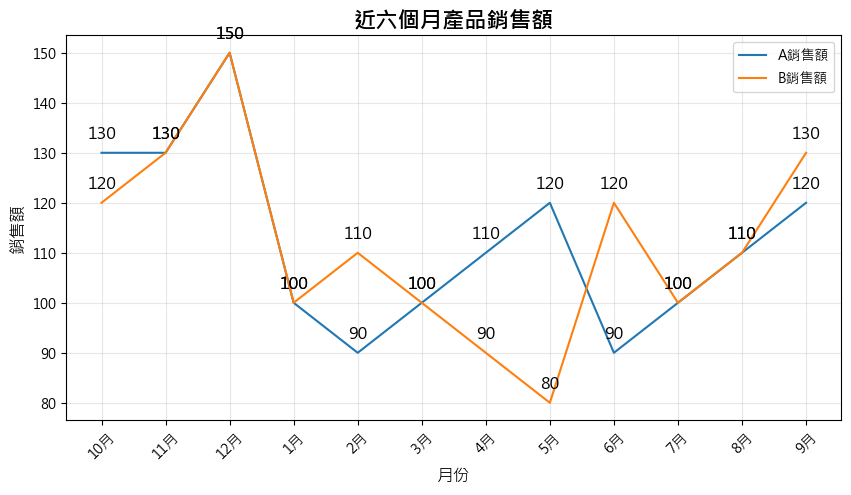

In [ ]:
# 練習將 csv 資料寫入資料庫並讀取，之後再將資料製作成統計圖

import csv
import pymysql
import pandas
import numpy
import matplotlib.pyplot as plt


# 1. 開啟檔案並轉成 list

with open("data/sales.csv","r",encoding="utf-8-sig") as file : 

    csv_file = csv.reader(file)

    data = list(csv_file)

data_colummn , *data_row = data

# 如果文字前後有空白，可以對資料處理一下

# data_column = [i.strip() for i in data_column]

# new_data_row = []

# for i in data_row :
    
#     a = [j.strip() for j in i]

#     new_data_row.append(a)


# 2. 用 pymysql 將檔案寫入資料庫

# connection = pymysql.connect(

#     host="127.0.0.1",
#     user="root",
#     database="example",
#     password="12345",
#     charset="utf8"

# )

# cursor = connection.cursor()

# sql = "INSERT INTO new_table_5 (月份,銷售額_A,銷售額_B) VALUES (%s,%s,%s)"

# try : 

#     cursor.executemany(sql,data_row)

#     connection.commit()

# except Exception as e : 

#     connection.rollback()

#     print("無法寫入",e)

# cursor.close()

# connection.close()


# 3. 將資料讀取出來

connection = pymysql.connect(

    host="127.0.0.1",
    user="root",
    database="example",
    password="12345",
    charset="utf8"

)

cursor = connection.cursor()

sql = "SELECT * FROM new_table_5"

cursor.execute(sql)

result = cursor.fetchall()

cursor.close()

connection.close()


# 4. 將資料整理成 pandas dataframe 或 numpy array 以利後續繪圖資料匯入

# a. 轉成 dataframe , columns 如果沒有就不用特別寫 columns = None , dataframe 會自己用索引來表示

dataframe = pandas.DataFrame(result)

# 因為沒有欄位名稱 , 所以要自己用 loc 來挑選

dataframe_months = dataframe.loc[:,0]
dataframe_sales_A = dataframe.loc[:,1]
dataframe_sales_B = dataframe.loc[:,2]

# 如果資料庫原本數值欄位是文字格式，就要把數值資料轉成數值格式，這邊因為已經是數值，所以不用

# dataframe.loc[:,1] = pandas.to_numeric(dataframe.loc[:,1])
# dataframe.loc[:,2] = pandas.to_numeric(dataframe.loc[:,2])

# b. 轉成 array

array = numpy.array(result)

array_months = array[:,0]
array_sales_A = array[:,1]
array_sales_B = array[:,2]


# 5. 將資料製作成圖表

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei" , "Simhei"]
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10,5))

plt.plot(dataframe_months,dataframe_sales_A,label="A銷售額")
plt.plot(dataframe_months,dataframe_sales_B,label="B銷售額")

for i , item in enumerate(dataframe_sales_A) :

    plt.annotate(f"{item}",(i,item),textcoords="offset points",xytext=(0,10),ha="center",fontsize=12)

for i , item in enumerate(dataframe_sales_B) :

    plt.annotate(f"{item}",(i,item),textcoords="offset points",xytext=(0,10),ha="center",fontsize=12)

plt.title("近六個月產品銷售額",fontsize=16,fontweight="bold")
plt.xlabel("月份",fontsize=12)
plt.ylabel("銷售額",fontsize=12)

plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


